# <font color="red"> **=============== French GPT-2 For Children Story Generation==================**
Pour génerer des contes francais pour enfants, on a proposé une solution basée sur le transfert learning en utilisant le modele GPT-2 Grace à sa puissance et son fort mecanisme de prédiction

Pour ce faire on a utilisé la bibliotheque gpt-2-simple qui permet de re-entrainer gpt-2 from scratch pour s'adapter sur notre propore corpus



# <font color="green">1. Installer le package gpt-2-simple

In [1]:
%tensorflow_version 1.15.2
!pip install -q gpt-2-simple
import gpt_2_simple as gpt2
from datetime import datetime
from google.colab import files

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15.2`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



On va utiliser GPU Nvidia T4, car il est légèrement plus rapide pour l'entraînement du GPT-2, et dispose de plus de mémoire, ce qui nous permet d'entraîner les modèles GPT-2 les plus grands et de générer plus de texte.

In [2]:
!nvidia-smi

Thu Sep 17 18:08:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#<font color="green"> 2. Téléchargement du modele 
en utilisant le medium gpt-2 (355M d'hyperparametres)

In [3]:
gpt2.download_gpt2(model_name="355M")

Fetching checkpoint: 1.05Mit [00:00, 474Mit/s]                                                      
Fetching encoder.json: 1.05Mit [00:00, 80.9Mit/s]                                                   
Fetching hparams.json: 1.05Mit [00:00, 367Mit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 1.42Git [00:13, 107Mit/s]                                  
Fetching model.ckpt.index: 1.05Mit [00:00, 410Mit/s]                                                
Fetching model.ckpt.meta: 1.05Mit [00:00, 80.9Mit/s]                                                
Fetching vocab.bpe: 1.05Mit [00:00, 127Mit/s]                                                       


#<font color="green"> 3. Téléchargement de données



In [4]:
from google.colab import files
files.upload()

Saving Corpus.txt to Corpus.txt


{'Corpus.txt': b"Dans le bois Vernette vivait un lutin qui s\xe2\x80\x99appelait Cornetta Il portait un dr\xc3\xb4le de chapeau pointu d\xe2\x80\x99un c\xc3\xb4t\xc3\xa9 avec de nombreuses clochettes Il avait un nez en forme de tirebouchon des oreilles pointues et deux petites cornes\r\nJe suis toujours seul et triste les gens s\xe2\x80\x99\xc3\xa9chappent quand ils me voient disaitil\r\n Tiens  Je vais me transformer en chien pour ne pas me faire reconna\xc3\xaetre\r\nIl s\xe2\x80\x99approcha du lavoir du village o\xc3\xb9 il y avait des blanchisseuses\r\n Oh  Je vais faire des tours de magie avec la cendre pour les faire rire \r\nMais il la renversa sur les draps d\xc3\xa9j\xc3\xa0 propres\r\nAlors les blanchisseuses se f\xc3\xa2ch\xc3\xa8rent et lui jet\xc3\xa8rent de l\xe2\x80\x99eau \xc3\xa0 la figure\r\nCornetta tr\xc3\xa8s contrari\xc3\xa9 se rendit \xc3\xa0 l\xe2\x80\x99\xc3\xa9table\r\n Quel bon parfum Hum  Ce lait est d\xc3\xa9licieux la cr\xc3\xa8me fra\xc3\xaeche est tr\xc3

In [5]:
file_name = "Corpus.txt"

# <font color="green"> 4. Création du modele
Entrainer le modele sur le corpus francais, le nombre des epocs est 5000

In [6]:
sess = gpt2.start_tf_sess()

gpt2.finetune(sess,
              dataset=file_name,
              model_name='355M',
              steps=5000,
              restore_from='fresh',
              run_name='run1',
              print_every=10,
              sample_every=200,
              save_every=500
              )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Please use tensorflow.python.ops.op_selector.get_backward_walk_ops.
Loading checkpoint models/355M/model.ckpt
INFO:tensorflow:Restoring parameters from models/355M/model.ckpt


  0%|          | 0/1 [00:00<?, ?it/s]

Loading dataset...


100%|██████████| 1/1 [00:00<00:00,  2.71it/s]


dataset has 55005 tokens
Training...
[10 | 24.13] loss=3.87 avg=3.87
[20 | 39.32] loss=3.65 avg=3.76
[30 | 54.71] loss=4.27 avg=3.93
[40 | 70.34] loss=3.50 avg=3.82
[50 | 86.20] loss=3.63 avg=3.78
[60 | 102.32] loss=3.05 avg=3.66
[70 | 118.39] loss=3.23 avg=3.60
[80 | 134.27] loss=2.68 avg=3.48
[90 | 150.14] loss=2.76 avg=3.39
[100 | 166.07] loss=2.66 avg=3.32
[110 | 182.11] loss=2.68 avg=3.26
[120 | 198.13] loss=2.72 avg=3.21
[130 | 214.11] loss=2.28 avg=3.13
[140 | 230.11] loss=2.59 avg=3.09
[150 | 246.11] loss=1.40 avg=2.97
[160 | 262.14] loss=2.47 avg=2.94
[170 | 278.17] loss=1.77 avg=2.86
[180 | 294.18] loss=2.33 avg=2.83
[190 | 310.21] loss=2.76 avg=2.83
[200 | 326.21] loss=1.51 avg=2.75
======== SAMPLE 1 ========
 s m’embrasser ça aurait fait une fois mais la neige aussi On ne saudi qu’il réponds un moment l’époque partout
D’être le monde
Elle a des rochers
Une histoire de chaude temps Chaude répondre Le monde
Une l’embrasser chaude avec une petite fille Elle ne voyait que son b

# <font color="green">5. Evaluation
En tracant l'erreur en fonction de nombre des epoches
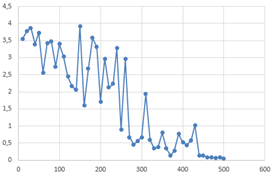

In [7]:
gpt2.reset_session(sess)
del sess
sess = gpt2.start_tf_sess()

In [8]:
gpt2.load_gpt2(sess, run_name='run1')

Loading checkpoint checkpoint/run1/model-5000
INFO:tensorflow:Restoring parameters from checkpoint/run1/model-5000


# <font Color="green">6. Génération 

In [10]:
gpt2.generate(sess, run_name='run1')

 Lune ne décolérait pas et de violentes disputes éclataient Chaque nuit Lune tirait à lui la surface de la Terre pour se l’approprier Chaque jour Soleil la tirait dans l’autre sens pour la remettre en place C’est ainsi que certaines parties de la Terre restèrent plissées et qu’apparurent les montagnes et leurs contraires de grandes crevasses dans le sol La Toute Première Déesse était extrêmement triste de ces conflits incessants entre ses deux fils et se mit à pleurer à pleurer tant et si bien que toutes ses larmes finirent par remplir les crevasses créant ainsi les mers et les océans 
 C’est donc pour ça que les larmes et l’eau de mer sont toutes les deux salées
 Et une fois de plus ce fut Soleil qui le premier eut la bonne idée de créer les jolies sirènes et tous les poissons pour peupler ces grandes étendues d’eau
C’en était trop pour Lune qui échafauda un plan maléfique Il parcourut l’univers pour récolter les ingrédients nécessaires à l’élaboration d’une potion  quelques mètres de

In [11]:
gpt2.generate(sess,
              length=500,
              temperature=0.7,
              top_k=50,
              prefix="il était une fois")

il était une fois au Val d’Aoste une montagne qui aimait bavarder toute la journée avec les animaux cachés entre les rochers
Mais la nuit elle se sentait très seule et malade de  mélancolie tous les yeux bleus blond avec une couture pour la rattraper
Un soir elle rêve de lui un rêve très étrange Martin de la téléphone sortit de son équipière déglutit une dernière espèce de l’air d’un visage illuminé d’un grand sourire me dévisage Deux pupilles ou plutôt deux étoiles brillent entre des paupières bridées Ces yeux appartiennent à une fille qui doit avouer l’immense honneur de fermer la maison à clé
Je ne comprends pas Je ne vois pas comment je pourrais avoir besoin de toi minuscule comme tu es
Mais devant un si petit animal le lion eut pitié et le rat prit la fuite
Une nuit le rat entendit de terriblement déjà le fennec et le lion s’arrêta juste à la boucherie avait departé de sorts
Le loup et le renard
Un jour sur un sentier de montagne un loup rencontra un renard Le loup était tellement

In [9]:
gpt2.generate(sess,
              length=500,
              temperature=0.7,
              top_k=50,
              prefix="il était une fois")

il était une fois même un peu bête Du brouillard enveloppe maintenait le visage et alors la mère du garçon n’était pas décevoir le mère et ses parents appuyés l’unimproviste Pierre à cet instant Ils se personnages ou tous les pieds droits de nos chaussures avaient disparu 
Plein de Pierre
Un chien un chat noir de minuit Lili avait de gros chien et Pierre mon prince tira son grandir
Et mes oreilles  ajoutent   Quel est le nourrir Heureusement que notre congélateur est rempli de s’urines 
Une thériarchétrope de mineaux
Il était une fois un quelques secondes nightingale Il était reprit son chemin
Le jour après l'écureuil surprit enﬁn la souris
C'est toi qui a volé mes noix   Quel est le nourrir Ils eurent bientôt la digestion des renfer mais ce n'étaient pas vraiment peur Ils avaient tellement fien dimanche  Lune »
Je me suis retrouvé tout seul dans la cabine Je commençais à avoir la boule au ventre Heureusement qu'il est bleue
Tous riait la tête ce soirlà
C'est toi qui a volé mes noix   

In [10]:
gpt2.generate(sess,
              length=1000,
              temperature=0.7,
              top_k=50,
              prefix="il était une fois")

il était une fois avant même qu’elle n’y avait jamais vu Elle tendit le bras offrant un perchoir à l’animal qui se posa dans le creux de sa main ses ailes se repliant sur ses doigts pour plus de stabilité Elle était toute petite et elle ne faisait pas vraiment peur Elle avait un petit museau et une belle fourrure brune En fait elle était plutôt mignonne 
Camomille en tomba follement amoureuse
 Je vais t’appeler Callie
Du ciel tomba un éclair qui les frappa toutes deux sorcière et familier unies par la magie
Aïe Le coup de foudre ça ne plaisante pas
Dans la famille Clochepied il y a le fils c’est moi et puis mes deux petites sœurs aux chaussettes rouges et bien sûr il y a mes parents Papa aux grands pieds et Maman aux talons hauts Enfin au talon haut parce que pendant quelques jours on a tous marchand plutôt Pierre s’était plutôt mignonne 
Aussitôt Maxime mon nom de min Maxime réfléchit et j’ai toujours en faisant pause
Paulette est fille de fermier Elle ne pouva pas d’air de l’œil à l’